In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [36]:
# Load the dataset
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# Check the first few rows and column names
print(data.head())
print(data.columns)

# Summary statistics of the dataset
print(data.describe())
print("Colnum : ", len(data.columns))
print("Rownum : ", len(data))

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [37]:
# Remove duplicates
print("Number of rows before removing duplicates: ", len(data))
data.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates: ", len(data))

# Encode Diabetes_012 into binary values (0 and 1)
data['Diabetes'] = np.where(data['Diabetes_012'].isin([1, 2]), 1, 0)
data.drop(columns=['Diabetes_012'], inplace=True)
print("Diabetes values:")
print(data['Diabetes'].value_counts(dropna=False))

Number of rows before removing duplicates:  253680
Number of rows after removing duplicates:  229781
Diabetes values:
0    190055
1     39726
Name: Diabetes, dtype: int64


In [38]:
# Unique values in each column
print(data.nunique())

# Unique values for Diabetes_012
print(data['Diabetes'].value_counts(dropna=False))

# Check data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
Diabetes                 2
dtype: int64
0    190055
1     39726
Name: Diabetes, dtype: int64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump   

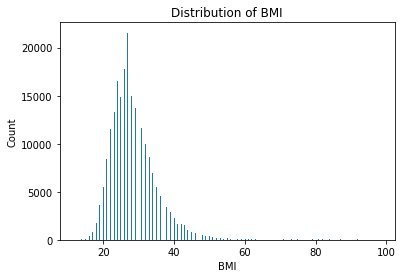

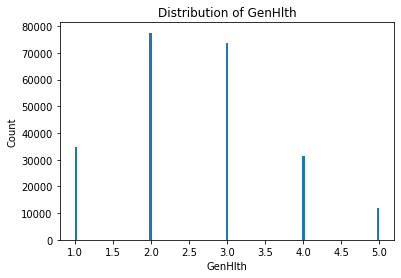

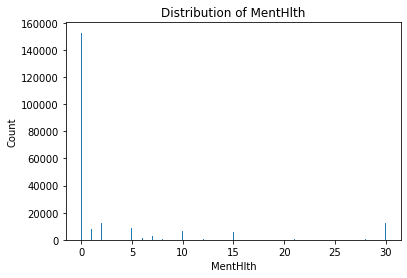

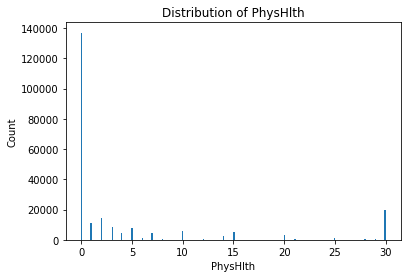

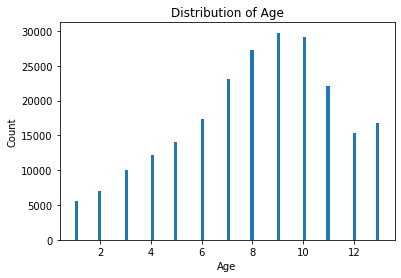

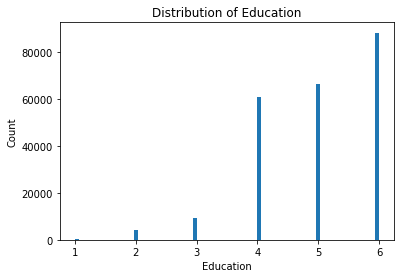

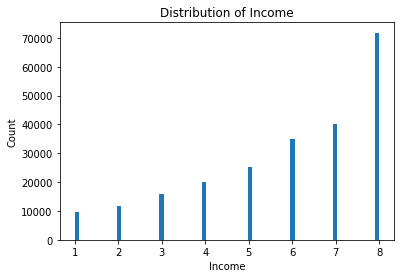

In [39]:
# Visualize histograms for non-binary numeric columns
non_binary_numeric_columns = data.select_dtypes(include=np.number).columns[data.nunique() > 2]
for col in non_binary_numeric_columns:
    plt.hist(data[col], bins='auto')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

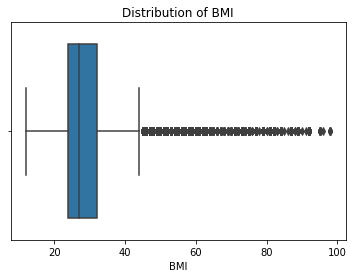

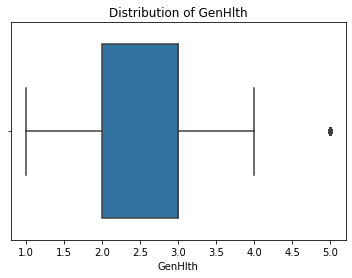

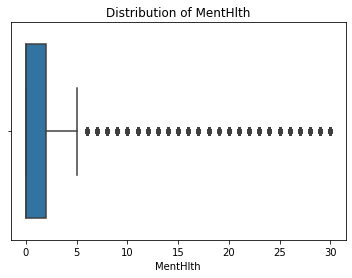

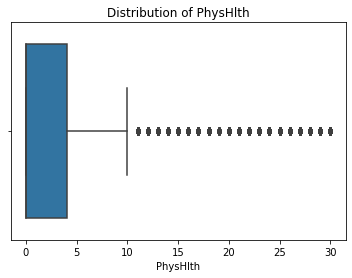

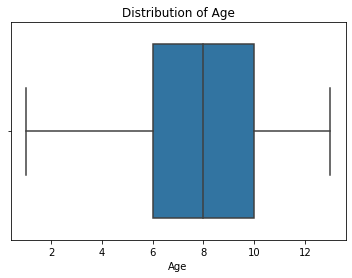

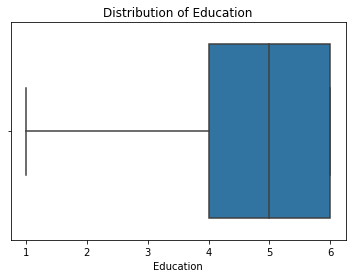

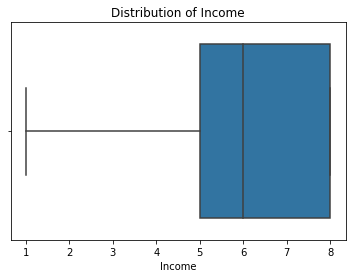

In [40]:
# Visualize boxplots for selected columns
columns_of_interest = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
for col in columns_of_interest:
    sns.boxplot(x=data[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [41]:
# Encode categorical variables
categorical_cols = ['Education', 'Income', 'GenHlth']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Calculate correlation matrix for non-binary columns
correlation_matrix_nonbinary = data.corr()

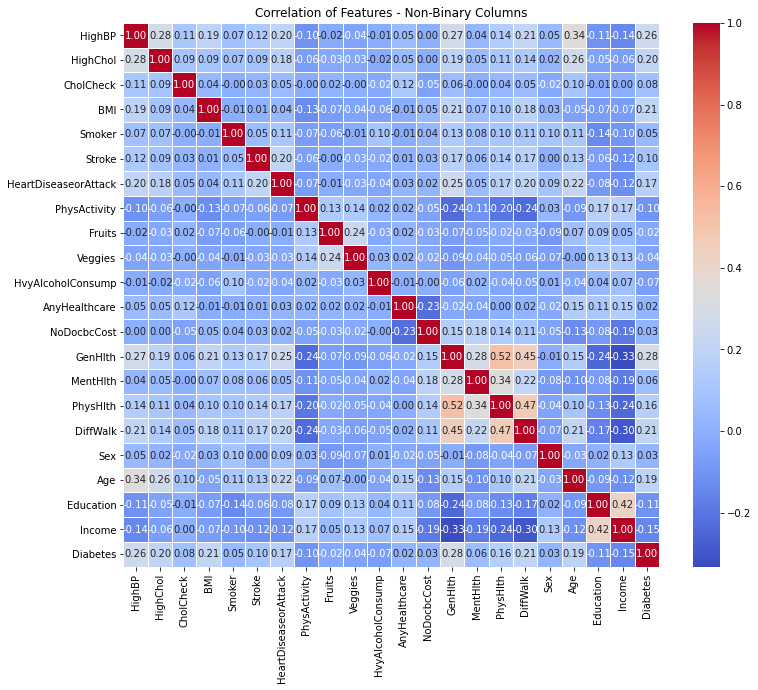

In [42]:
# Increase the size of the heatmap
plt.figure(figsize=(12, 10))

# Generate heatmap for non-binary columns
sns.heatmap(correlation_matrix_nonbinary, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title
plt.title("Correlation of Features - Non-Binary Columns")

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


In [43]:
# Calculate tetrachoric correlation for binary columns
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
               'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Diabetes']
binary_data = data[binary_cols]
tetrachoric_corr = binary_data.corr()

print("Tetrachoric Correlation for Binary Columns:")
print(tetrachoric_corr)

Tetrachoric Correlation for Binary Columns:
                        HighBP  HighChol  CholCheck    Smoker    Stroke  \
HighBP                1.000000  0.284186   0.111220  0.074237  0.124426   
HighChol              0.284186  1.000000   0.094753  0.074627  0.089258   
CholCheck             0.111220  0.094753   1.000000 -0.003776  0.027894   
Smoker                0.074237  0.074627  -0.003776  1.000000  0.054438   
Stroke                0.124426  0.089258   0.027894  0.054438  1.000000   
HeartDiseaseorAttack  0.201271  0.176279   0.049995  0.105154  0.198863   
PhysActivity         -0.104131 -0.063266  -0.004409 -0.066981 -0.059440   
Veggies              -0.042853 -0.027254  -0.000537 -0.013892 -0.033141   
HvyAlcoholConsump    -0.014218 -0.019104  -0.021043  0.096052 -0.021272   
AnyHealthcare         0.052084  0.052412   0.115539 -0.013983  0.013565   
NoDocbcCost           0.002216  0.002900  -0.054198  0.037353  0.028691   
DiffWalk              0.211498  0.135826   0.048969  0.1

In [44]:
# Calculate polychoric correlation for ordinal columns
ordinal_cols = ['Education', 'Income', 'GenHlth']
ordinal_data = data[ordinal_cols]
polychoric_corr = ordinal_data.corr()

print("Polychoric Correlation for Ordinal Columns:")
print(polychoric_corr)

Polychoric Correlation for Ordinal Columns:
           Education    Income   GenHlth
Education   1.000000  0.419354 -0.244963
Income      0.419354  1.000000 -0.331935
GenHlth    -0.244963 -0.331935  1.000000


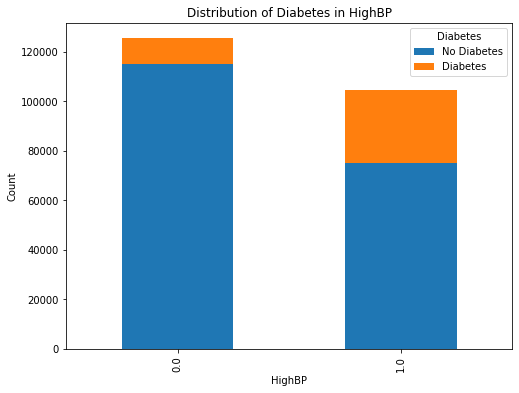

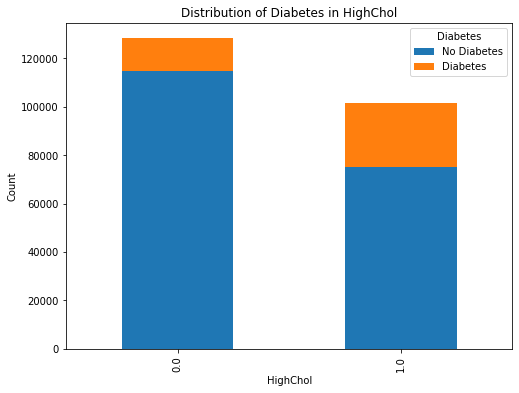

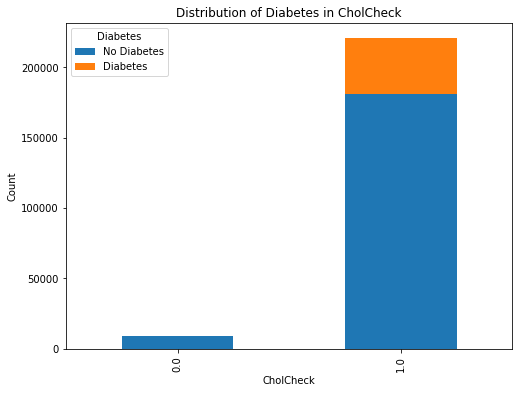

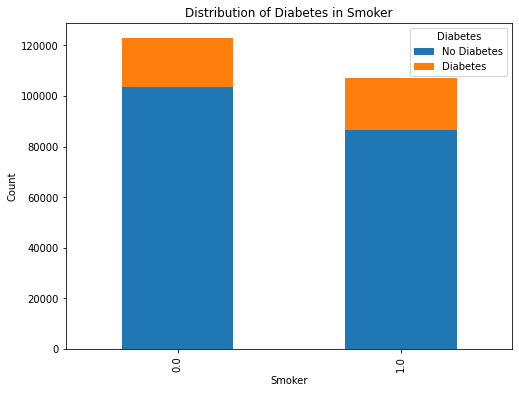

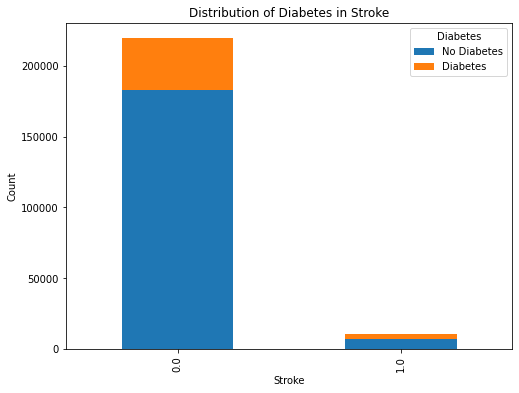

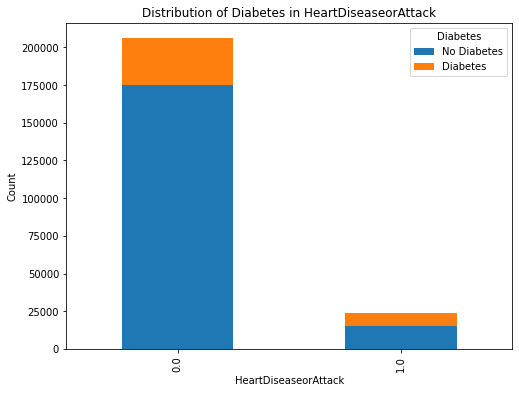

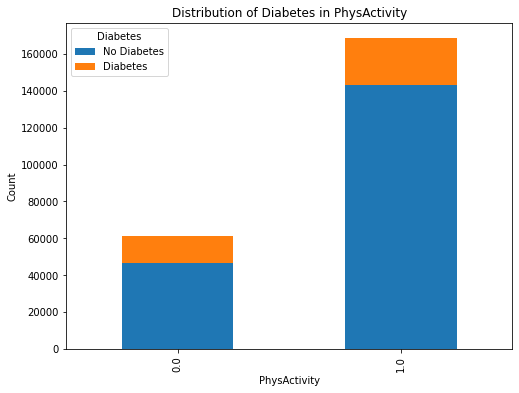

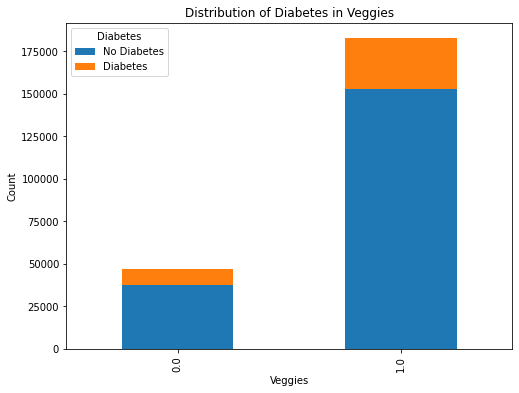

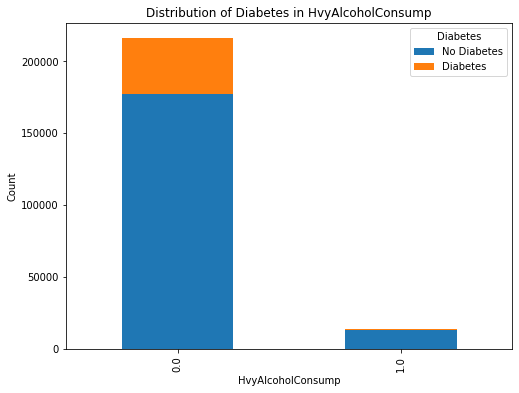

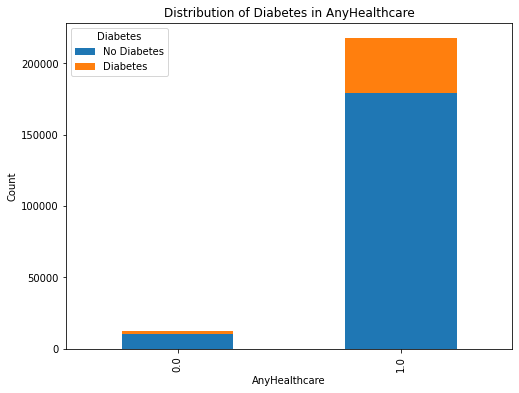

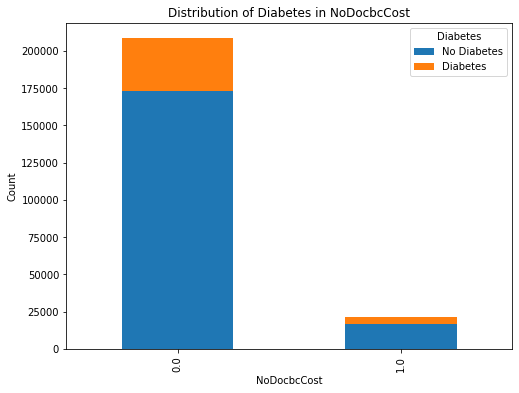

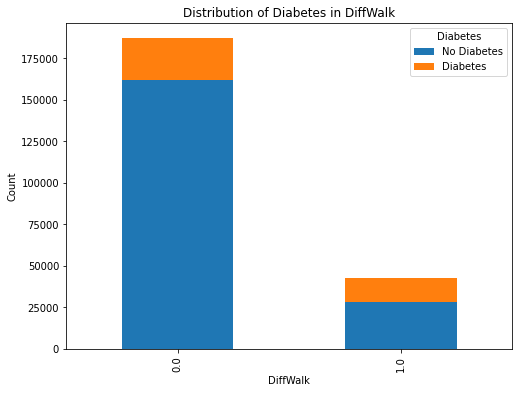

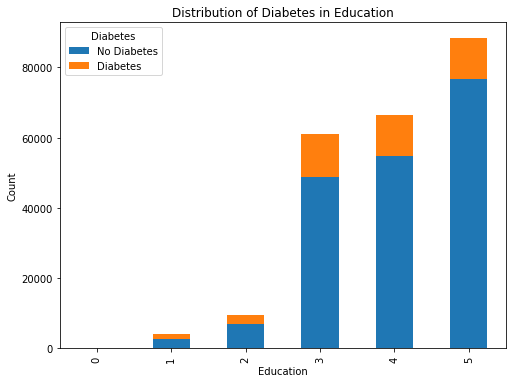

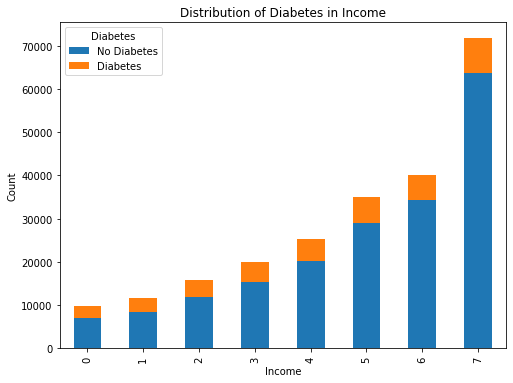

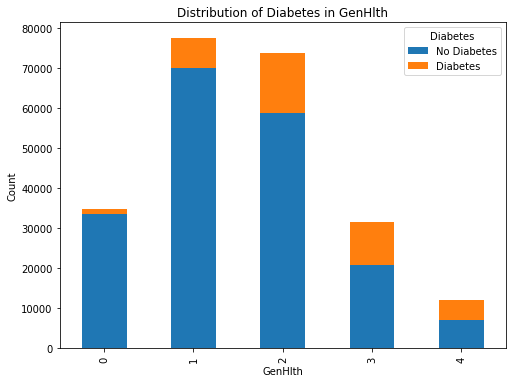

In [45]:
# Visualize distribution of Diabetes across categorical variables
categorical_cols_without_diabetes = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                                     'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                                     'DiffWalk', 'Education', 'Income', 'GenHlth']
for col in categorical_cols_without_diabetes:
    df_grouped = data.groupby([col, 'Diabetes']).size().unstack(fill_value=0)
    
    # Plot stacked barplot
    df_grouped.plot(kind='bar', stacked=True, figsize=(8, 6))
    
    plt.title(f"Distribution of Diabetes in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
    plt.show()

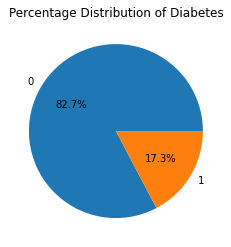

In [46]:
# Visualize percentage distribution of Diabetes
diabetes_percentage = data['Diabetes'].value_counts(normalize=True) * 100
plt.pie(diabetes_percentage, labels=diabetes_percentage.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Diabetes")
plt.show()

1. Join P.

Aka je pravdepodobnost, ze ten ktory ma vacsi príjem ma lepsiu kvlitu vzdelavania a ma lepsi zdravotny stav a nizsiu sancu na diabetes ?
P(I,E,G,D) = P(I) * P(E|I) * P(G|E) * P(D|G)  - parent child


2. Marginal p.

Aka je pravdepoobnost, ze zdravotny stav cloveka bude dobry ? 
P(E) = P(E|I) * P(I)                        - parent child          
P(Ph) = P(Dw) * P(Pa) * P(Ph | Dw, Pa)
P(Gh) = P(E) * P(Ph) * P(Gh | E, Ph)

P(Gh) = P(I,Dw,Pa,E,Ph,Gh) ??

In [50]:

# Define the bins for one-hot encoding
physhlth_bin = [0,15,31]
age_bin = [0,6,14]
income_bin = [0,4,8]
education_bin = [0,3,6]
GenHlth_bin = [0,2,5]
labels = [0, 1]

# Make a copy of the DataFrame 'data'
data_bayes = data.copy()

# Apply one-hot encoding to the 'PhysHlth' column
data_bayes['PhysHlth'] = pd.cut(data_bayes['PhysHlth'], bins=physhlth_bin, labels=labels, right=False)
data_bayes['Age'] = pd.cut(data_bayes['Age'], bins=age_bin, labels=labels, right=False)
data_bayes['Income'] = pd.cut(data_bayes['Income'], bins=income_bin, labels=labels, right=False)
data_bayes['Education'] = pd.cut(data_bayes['Education'], bins=education_bin, labels=labels, right=False)
data_bayes['Education'] = pd.cut(data_bayes['Education'], bins=education_bin, labels=labels, right=False)


data_bayes['GenHlth'] = pd.cut(data_bayes['GenHlth'], bins=physhlth_bin, labels=labels, right=False)


variables = ['Age', 'HighChol', 'HighBP', 'Income', 'Education', 'Smoker', 'GenHlth', 'DiffWalk', 'PhysHlth', 'PhysActivity', 'Diabetes']
probability_list = {}



In [51]:

for variable in variables:
    # Calculate the probability distribution for the current variable
    prob_dist = data_bayes[variable].value_counts(normalize=True).sort_index()
    
    # Create a DataFrame for the current variable
    df = pd.DataFrame({'Value': prob_dist.index, 'Probability': prob_dist.values})
    
    # Save the DataFrame into probability_list dictionary with index of variable name
    probability_list[variable] = df

    # Display the probability distribution table
    print(f"P({variable})")
    print(df)
    
    # Calculate and display the sum of probabilities
    print(f"Sum of probabilities: {prob_dist.sum()}\n")

# Print the probability_list dictionary
print(probability_list)

P(Age)
  Value  Probability
0     0     0.212763
1     1     0.787237
Sum of probabilities: 1.0

P(HighChol)
   Value  Probability
0    0.0      0.55824
1    1.0      0.44176
Sum of probabilities: 1.0

P(HighBP)
   Value  Probability
0    0.0     0.545559
1    1.0     0.454441
Sum of probabilities: 1.0

P(Income)
  Value  Probability
0     0     0.249925
1     1     0.750075
Sum of probabilities: 1.0

P(Education)
  Value  Probability
0     0          1.0
1     1          0.0
Sum of probabilities: 1.0

P(Smoker)
   Value  Probability
0    0.0     0.534339
1    1.0     0.465661
Sum of probabilities: 1.0

P(GenHlth)
  Value  Probability
0     0          1.0
1     1          0.0
Sum of probabilities: 1.0

P(DiffWalk)
   Value  Probability
0    0.0     0.814493
1    1.0     0.185507
Sum of probabilities: 1.0

P(PhysHlth)
  Value  Probability
0     0     0.864841
1     1     0.135159
Sum of probabilities: 1.0

P(PhysActivity)
   Value  Probability
0    0.0     0.266645
1    1.0     0.733355

In [52]:
for variable, df in probability_list.items():
    print(variable)
    print(df.to_string(index=False))
    print("\n")


Age
Value  Probability
    0     0.212763
    1     0.787237


HighChol
 Value  Probability
   0.0      0.55824
   1.0      0.44176


HighBP
 Value  Probability
   0.0     0.545559
   1.0     0.454441


Income
Value  Probability
    0     0.249925
    1     0.750075


Education
Value  Probability
    0          1.0
    1          0.0


Smoker
 Value  Probability
   0.0     0.534339
   1.0     0.465661


GenHlth
Value  Probability
    0          1.0
    1          0.0


DiffWalk
 Value  Probability
   0.0     0.814493
   1.0     0.185507


PhysHlth
Value  Probability
    0     0.864841
    1     0.135159


PhysActivity
 Value  Probability
   0.0     0.266645
   1.0     0.733355


Diabetes
 Value  Probability
     0     0.827114
     1     0.172886


